In [1]:
!git log -1


commit b267d6813b48cb3064288c0f8974f05e46842fde (HEAD -> main, origin/main, origin/HEAD)
Author: georgesmbock <mbock@DESKTOP-3KEOBHU>
Date:   Wed Oct 22 15:13:55 2025 +0100

    Home Work Week 3 and more


In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'


In [3]:
!wget $url -o download_week2.log

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('course_lead_scoring.csv')

In [6]:
df.head(2).T

,0,1
lead_source,paid_ads,social_media
industry,NaN,retail
number_of_courses_viewed,1,1
annual_income,79450.0,46992.0
employment_status,unemployed,employed
location,south_america,south_america
interaction_count,4,1
lead_score,0.94,0.8
converted,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


## Data preparation
* Check if the missing values are presented in the features.
* If there are missing values:
    * For categorical features, replace them with 'NA'
    * For numerical features, replace with with 0.0

In [8]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [9]:
def missing_replace(l, val):
    for col in l:
        df[col].fillna(val, inplace=True)
    return df
    

In [10]:
l = [col for col in df.columns if df[col].dtypes =='O' and df[col].isna().sum() != 0]
val = 'NA'
df = missing_replace(l, val)


/tmp/ipykernel_237364/3076195048.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(val, inplace=True)


In [11]:
l = [col for col in df.columns if df[col].dtypes !='O' and df[col].isna().sum() != 0]
val = 0.0
df = missing_replace(l, val)

/tmp/ipykernel_237364/3076195048.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(val, inplace=True)


In [12]:
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

### Question 1
What is the most frequent observation (mode) for the column industry?

In [13]:
df['industry'].mode()

0    retail
Name: industry, dtype: object

### Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

**What are the two features that have the biggest correlation?**

- interaction_count and lead_score
- number_of_courses_viewed and lead_score
- number_of_courses_viewed and interaction_count
- annual_income and interaction_count

Only consider the pairs above when answering this question

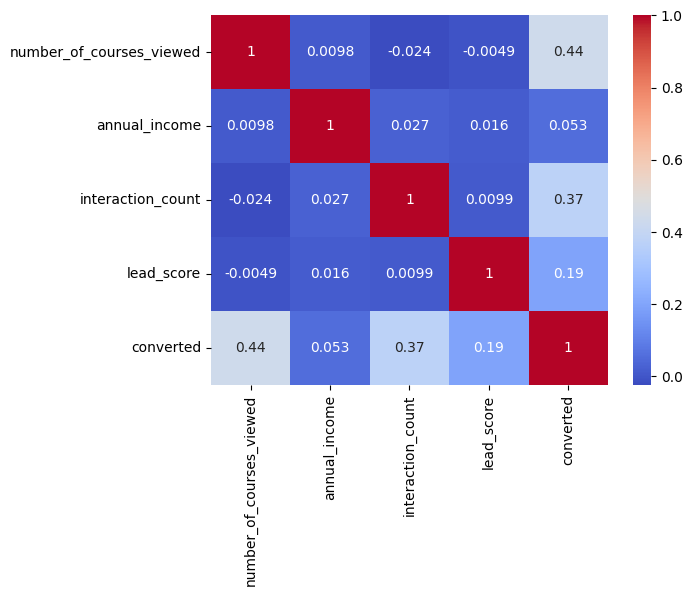

In [14]:
# nueric columns
num_cols = [col for col in df.columns if df[col].dtypes != 'O']

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

Result: annual_income and interaction_count

## Split Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
data_full_train, data_test = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
data_train, data_val = train_test_split(data_full_train, test_size=0.25, random_state=42)

In [18]:
len(data_train) + len(data_test) + len(data_val) -len(df)

0

In [19]:
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)

In [20]:
y_train = data_train.converted.values
y_test = data_test.converted.values
y_val = data_val.converted.values

In [21]:
del data_train['converted']
del data_test['converted']
del data_val['converted']

## EDA

In [22]:
data_full_train = data_full_train.reset_index(drop=True)

In [23]:
data_full_train.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [24]:
data_full_train.converted.unique()

array([0, 1])

### Question 3
- Calculate the mutual information score between converted and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using round(score, 2).
- Which of these variables has the biggest mutual information score?

>- industry
> - location
> - lead_source
> - employment_status

In [25]:
from sklearn.metrics import mutual_info_score

In [26]:
categorical_columns = list(col for col in df.columns if df[col].dtypes == 'O') 
categorical_columns 

['lead_source', 'industry', 'employment_status', 'location']

In [27]:
def mutual_info_churn(series):
    return mutual_info_score(series, data_full_train.converted)

In [28]:
mi = data_full_train[categorical_columns].apply(mutual_info_churn)
mi.sort_values(ascending=False)

lead_source          0.025665
employment_status    0.013258
industry             0.011685
location             0.002253
dtype: float64

### Question 4
- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
- model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [29]:
from sklearn.feature_extraction import DictVectorizer

In [30]:
num_columns = num_cols[:-1]

In [31]:
train_dicts = data_train[categorical_columns + num_columns].to_dict(orient='records')
val_dicts = data_val[categorical_columns + num_columns].to_dict(orient='records')
#test_dicts = data_test[categorical_columns + numerical_columns].to_dict(orient='records')

In [32]:
dv = DictVectorizer(sparse=False)

In [33]:
X_train = dv.fit_transform(train_dicts)
X_val = dv.fit_transform(val_dicts)

In [34]:
X_train.shape

(876, 31)

In [35]:
y_train.shape

(876,)

In [36]:
X_val.shape

(293, 31)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [39]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [40]:
from sklearn.metrics import accuracy_score

In [41]:
y_pred = model.predict(X_val)

In [42]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


### Question 5
- Let's find the least useful feature using the feature elimination technique.
- Train a model using the same features and parameters as in Q4 (without rounding).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?

> - 'industry'
> - 'employment_status'
> - 'lead_score'

-# Features elimination one by one
feature_impacts = {}

for feature in data_full_train.columns:
    data_full_train_temp = data_full_train.drop(columns=[feature])
    data_train_sel, data_val_sel = train_test_split(data_full_train_temp, test_size=0.25, random_state=42)
    data_train = data_train.reset_index(drop=True)
    data_val = data_val.reset_index(drop=True)
    y_train = data_train.converted.values
    y_val = data_val.converted.values
    
    X_train = dv.fit_transform(train_dicts)
    X_val = dv.fit_transform(val_dicts)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    feature_impacts[feature] = acc

-# Results
results = pd.DataFrame.from_dict(feature_impacts, orient='index', columns=['Accuracy'])
results['Diff'] = results['Accuracy'] - base_accuracy
results.sort_values(by='Accuracy', ascending=True, inplace=True)

print("Impact de la suppression de chaque feature :\n")
print(results)


 Dropping var
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

feature_impacts = {}

 Liste des features (tes 9 variables explicatives)
features = categorical_columns + num_columns

for feature in features:
    # Supprimer la feature courante
    temp_features = [f for f in features if f != feature]

    # Recréer les dicts pour DictVectorizer
    train_dicts_temp = data_train[temp_features].to_dict(orient='records')
    val_dicts_temp = data_val[temp_features].to_dict(orient='records')

    X_train_temp = dv.fit_transform(train_dicts_temp)
    X_val_temp = dv.transform(val_dicts_temp)

    # Réentraîner le modèle
    model_temp = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_temp.fit(X_train_temp, y_train)

    # Prédiction et évaluation
    y_pred_temp = model_temp.predict(X_val_temp)
    acc = accuracy_score(y_val, y_pred_temp)

    feature_impacts[feature] = acc

Résultat sous forme de DataFrame
results = pd.DataFrame.from_dict(feature_impacts, orient='index', columns=['Accuracy'])
results['Diff'] = results['Accuracy'] - accuracy  # différence avec le modèle de base
results.sort_values(by='Accuracy', ascending=False, inplace=True)

print("Impact de la suppression de chaque variable :")
print(results)


In [43]:
# Dictionary to store the impact of removing each feature
feature_impacts = {}

# List of features (your 9 explanatory variables)
features = categorical_columns + num_columns

# Loop through each feature to evaluate its impact
for feature in features:
    # Create a list of features excluding the current one
    temp_features = [f for f in features if f != feature]

    # Convert the selected features to dictionaries for DictVectorizer
    train_dicts_temp = data_train[temp_features].to_dict(orient='records')
    val_dicts_temp = data_val[temp_features].to_dict(orient='records')

    # Transform the dictionaries into feature matrices
    X_train_temp = dv.fit_transform(train_dicts_temp)  
    X_val_temp = dv.transform(val_dicts_temp)          

    # Train a logistic regression model with the reduced feature set
    model_temp = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_temp.fit(X_train_temp, y_train)

    # Make predictions and calculate accuracy
    y_pred_temp = model_temp.predict(X_val_temp)
    acc = accuracy_score(y_val, y_pred_temp)

    # Store the accuracy after removing this feature
    feature_impacts[feature] = acc

# Convert the results into a DataFrame for easy analysis
results = pd.DataFrame.from_dict(feature_impacts, orient='index', columns=['Accuracy'])

# Calculate the difference from the base model accuracy
results['Diff'] = results['Accuracy'] - accuracy  # 'accuracy' is the base model accuracy

# Sort features by their impact on accuracy (highest accuracy first)
results.sort_values(by='Accuracy', ascending=False, inplace=True)

# Display the results
print("Impact of removing each feature:")
print(results)


Impact of removing each feature:
                          Accuracy      Diff
annual_income             0.853242  0.153584
location                  0.709898  0.010239
lead_score                0.706485  0.006826
lead_source               0.703072  0.003413
industry                  0.699659  0.000000
employment_status         0.696246 -0.003413
number_of_courses_viewed  0.556314 -0.143345
interaction_count         0.556314 -0.143345


### Question 6
- Now let's train a regularized logistic regression.
- Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.
- Which of these C leads to the best accuracy on the validation set?

In [44]:
# List of c values
C_values = [0.01, 0.1, 1, 10, 100]

results_C = []

for C in C_values:
    # Creating model
    model_ = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    
    # Train
    model_.fit(X_train, y_train)
    
    # Prediction
    y_pred = model_.predict(X_val)
    
    # Accuracy
    acc = accuracy_score(y_val, y_pred)
    
    results_C.append((C, acc))

# Display results
print("Accuracy for  C values :")
for C, acc in results_C:
    print(f"C = {C:>6} → Accuracy = {acc:.3f}")


Accuracy for  C values :
C =   0.01 → Accuracy = 0.700
C =    0.1 → Accuracy = 0.700
C =      1 → Accuracy = 0.700
C =     10 → Accuracy = 0.700
C =    100 → Accuracy = 0.700


# Module 4: Evaluation

## 1. Accuracy

In [45]:
model4 = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [46]:
model4.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [47]:
y_pred = model4.predict_proba(X_val)[:, 1]

In [48]:
y_pred

array([0.61192162, 0.79982616, 0.53021342, 0.47131479, 0.5706613 ,
       0.44227166, 0.87127669, 0.84883114, 0.83290037, 0.614978  ,
       0.54968025, 0.78153087, 0.69039784, 0.77017121, 0.52659438,
       0.91706424, 0.53170633, 0.42123047, 0.30146454, 0.84881582,
       0.79488652, 0.73670373, 0.44527209, 0.64838383, 0.41768818,
       0.75393417, 0.90166115, 0.33903047, 0.43181429, 0.9680681 ,
       0.92018714, 0.37487987, 0.65230099, 0.90650057, 0.75164115,
       0.6420212 , 0.82250074, 0.83375553, 0.65911599, 0.30978853,
       0.78942264, 0.35546364, 0.96517758, 0.63389304, 0.51274194,
       0.53230532, 0.82287784, 0.744074  , 0.73452312, 0.68955216,
       0.46964441, 0.84539251, 0.55635242, 0.92637871, 0.65258021,
       0.61526271, 0.63816994, 0.28304016, 0.48049823, 0.57890616,
       0.35497341, 0.62175049, 0.38960775, 0.61156055, 0.85304277,
       0.75430135, 0.89185953, 0.71946457, 0.95387623, 0.89209517,
       0.75277086, 0.33850137, 0.61376593, 0.51622273, 0.64088

In [49]:
converted_pred = (y_pred >= .5)

In [50]:
converted_pred

array([ True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,

In [51]:
(converted_pred  == y_val).mean()

np.float64(0.6996587030716723)

In [52]:
good_pred = np.sum(converted_pred == y_val)
good_pred

np.int64(205)

In [53]:
acc =  good_pred / len(X_val)

acc

np.float64(0.6996587030716723)

In [54]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    converted_deci = (y_pred >= t)
    score = (converted_deci == y_val).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.556
0.05 0.556
0.10 0.556
0.15 0.556
0.20 0.556
0.25 0.567
0.30 0.570
0.35 0.597
0.40 0.618
0.45 0.666
0.50 0.700
0.55 0.758
0.60 0.778
0.65 0.771
0.70 0.737
0.75 0.703
0.80 0.642
0.85 0.573
0.90 0.509
0.95 0.464
1.00 0.444


In [55]:
scores

[np.float64(0.5563139931740614),
 np.float64(0.5563139931740614),
 np.float64(0.5563139931740614),
 np.float64(0.5563139931740614),
 np.float64(0.5563139931740614),
 np.float64(0.5665529010238908),
 np.float64(0.5699658703071673),
 np.float64(0.5972696245733788),
 np.float64(0.6177474402730375),
 np.float64(0.6655290102389079),
 np.float64(0.6996587030716723),
 np.float64(0.757679180887372),
 np.float64(0.7781569965870307),
 np.float64(0.7713310580204779),
 np.float64(0.7372013651877133),
 np.float64(0.7030716723549488),
 np.float64(0.6416382252559727),
 np.float64(0.5733788395904437),
 np.float64(0.5085324232081911),
 np.float64(0.4641638225255973),
 np.float64(0.44368600682593856)]

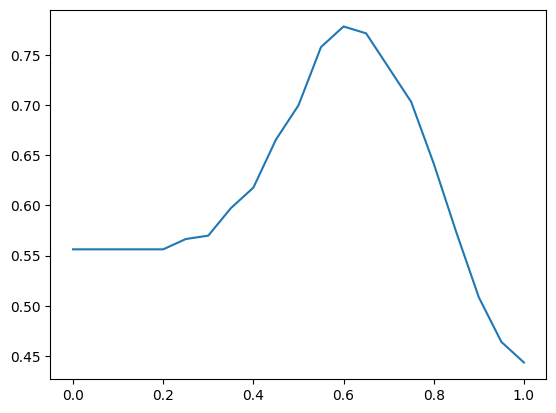

In [56]:
plt.plot(thresholds, scores)

In [57]:
from collections import Counter
Counter(y_pred <= .25)
# Counter({True: 4, False: 1})


Counter({np.False_: 290, np.True_: 3})

In [58]:
from sklearn.dummy import DummyClassifier

# Dummy model qui prédit toujours la classe majoritaire
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy_pred = (dummy.predict_proba(X_val)[:, 1] >= .5)
acc_dummy = accuracy_score(y_val, dummy_pred)
print(acc_dummy)

0.5563139931740614


## 2. Matrix of Confusion
- Diiferent types of errors and correct decisions
- Arranging them in a table

In [59]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [60]:
t = .5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)


In [61]:
tp = np.sum(predict_positive & actual_positive)

fp = np.sum(predict_positive & actual_negative)

fn = np.sum(predict_negative & actual_positive)

tn = np.sum(predict_negative & actual_negative)

In [62]:
matrix_conf = np.array([
    [tn, fp],
    [fn, tp]
])
matrix_conf

array([[ 50,  80],
       [  8, 155]])

In [63]:
(matrix_conf / matrix_conf.sum()).round(2)

array([[0.17, 0.27],
       [0.03, 0.53]])

## 3. Precision and Recall

In [64]:
(tp + tn) / (tp + tn + fp + fn) # Accuracy

np.float64(0.6996587030716723)

In [65]:
precision = 100 * tp / (tp + fp)
print('%.2f' % precision)

65.96


In [66]:
recall = 100 * tp / (tp + fn)
print('%.2f' % recall)

95.09


## 4. ROC Curves

### TPR and FRP

In [67]:
fpr = 100 * fp / (tn + fp)

print('%.2f' % fpr)

61.54


In [68]:
tpr = 100 * tp / (fn + tp)
print('%.2f' % tpr)

95.09


In [69]:
scores_ = []
threshods = np.linspace(0, 1, 101)

for t in threshods:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores_.append((t, tp, fp, fn, tn))

In [ ]:
columns = ['threshods', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores_, columns=columns)


In [ ]:
df_scores

In [ ]:
df_scores[::10]

In [ ]:
df_scores['tpr'] = (100 * df_scores.tp / (df_scores.fn + df_scores.tp)).round(2)

df_scores['fpr'] = (100 * df_scores.fp / (df_scores.tn + df_scores.fp)).round(2)

In [ ]:
df_scores[::2]

In [ ]:
plt.plot(df_scores.threshods, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshods, df_scores['fpr'], label='FPR')
plt.legend()
plt.show()

### Random model

In [ ]:
np.random.seed(2)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [ ]:
y_rand.round(3)

In [ ]:
((y_rand >= .5) == y_val).mean()

In [ ]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores_ = []
    threshods = np.linspace(0, 1, 101)

    for t in threshods:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores_.append((t, tp, fp, fn, tn))

    columns = ['threshods', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores_, columns=columns)
    df_scores['tpr'] = (100 * df_scores.tp / (df_scores.fn + df_scores.tp)).round(2)
    df_scores['fpr'] = (100 * df_scores.fp / (df_scores.tn + df_scores.fp)).round(2)

    return df_scores

In [ ]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [ ]:
df_rand[::5]

In [ ]:
plt.plot(df_rand.threshods, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshods, df_rand['fpr'], label='FPR')
plt.legend()
plt.show()

### Ideal model

In [ ]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
print(num_neg, num_pos)

réquilibrage des données:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])


y_ideal_predi = np.linspace(0, 1, len(y_val))

preuve:
c = 1 -y_val.mean()

((y_ideal_pred >= c) == y_ideal).mean() doit donner 1

In [ ]:
1 -y_val.mean()

In [ ]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal_pred = np.linspace(0, 1, len(y_val))

((y_ideal_pred >= .443) == y_ideal).mean()

In [ ]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [ ]:
plt.plot(df_ideal.threshods, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshods, df_ideal['fpr'], label='FPR')
plt.legend()
plt.show()

### Putting everyting together

In [ ]:
plt.plot(df_scores.threshods, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshods, df_scores['fpr'], label='FPR')


#plt.plot(df_rand.threshods, df_rand['tpr'], label='TPR')
#plt.plot(df_rand.threshods, df_rand['fpr'], label='FPR')


plt.plot(df_ideal.threshods, df_ideal['tpr'], label='TPR', color='black')
plt.plot(df_ideal.threshods, df_ideal['fpr'], label='FPR', color='black')

plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='model')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0, 100], [0, 100], label='random')
#plt.plot(df_rand.fpr, df_rand.tpr, label='random')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label='model')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, threshold = roc_curve(y_val, y_pred)

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='model')
plt.plot([0, 1], [0, 1], label='random', linestyle='--')
#plt.plot(df_rand.fpr, df_rand.tpr, label='random')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label='model')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
plt.show()

### 6. ROC AUC 
- Area under the ROC curve - useful metric
- Interpretation of AUC

In [ ]:
from sklearn.metrics import auc

In [ ]:
auc(fpr, tpr)

In [ ]:
auc(df_scores.fpr, df_scores.tpr) / 100

In [ ]:
auc(df_ideal.fpr, df_ideal.tpr) / 100

In [ ]:
fpr, tpr, threshold = roc_curve(y_val, y_pred)
auc(df_scores.fpr, df_scores.tpr) / 100

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_val, y_pred)

In [ ]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [ ]:
import random

In [ ]:
n = 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success += 1

success / n

In [ ]:
n = 50000

np.random.seed(4)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)
(pos[pos_ind] > neg[neg_ind]).mean()

### 7. Cross-Validation
- Evaluating the same model on different subsets of data
- Getting the average prediction and the spread within predictions

In [ ]:
def train(df_train, y_train, c=1.0):
    dicts = df_train[categorical_columns + num_columns].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    mo = LogisticRegression(C=c, max_iter=1000, random_state=42)
    mo.fit(X_train, y_train)

    return dv, mo

In [ ]:
dv, modl = train(data_train, y_train)

In [ ]:
def predict(df, dv, modl):
    dicts = df[categorical_columns + num_columns].to_dict(orient='records')
    #dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dicts)
    y_pred = modl.predict_proba(X)[:, 1]
    return y_pred

In [ ]:
y_pre = predict(data_val, dv, modl)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
train_idx, val_idx = next(kfold.split(data_full_train))

In [ ]:
len(train_idx), len(val_idx), len(data_full_train)

In [ ]:
data_train_kfold = data_full_train.iloc[train_idx]
data_val_kfold = data_full_train.iloc[val_idx]

In [ ]:
#!pip install tqdm

In [ ]:
from tqdm.auto import tqdm

In [ ]:
n_splits = 5
for c in [0.001, 0.01, 0.1, 0.5, 1., 5., 10.]:
    scores_kfold = []

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    
    for train_idx, val_idx in tqdm(kfold.split(data_full_train), total=n_splits):
        data_train_kfold = data_full_train.iloc[train_idx]
        data_val_kfold = data_full_train.iloc[val_idx]
        
        y_train_kfold = data_train_kfold.converted.values
        y_val_kfold = data_val_kfold.converted.values
        
        dv, model_kfold = train(data_train_kfold, y_train_kfold, c)
        
        y_pred_kfold = predict(data_val_kfold, dv, model_kfold)
        
        auc = roc_auc_score(y_val_kfold, y_pred_kfold)
        scores_kfold.append(auc)

        print('C=%s %.3f +- %.3f' % (c, np.mean(scores_kfold),  np.std(scores_kfold)))

In [ ]:
scores_kfold

In [ ]:
data_full_train_fin = data_full_train.reset_index(drop=True)
y_train_full_fin = data_full_train_fin.converted.values
dv, modl_fin_part = train(data_full_train_fin, y_train_full_fin, c=1.0)
y_pred_fin_part = predict(data_test, dv, modl_fin_part)

auc_fin_part = roc_auc_score(y_test, y_pred_fin_part)
auc_fin_part

### 8. Explore more
- Cheick theprecision and recall of the dummy classifier that always predict 'FALSE'
- F1 score = 2 * P * R/ (P + R)
- Evaluate precision and recall at different thresholds, plot Pvs R - this way you'll get the precision/recall curve (similar to ROC curve)
- Area under the PR curve is also a useful metric

Other projets:
- Calcuulate the metrics for datasets from the previous week

In [ ]:
!git add home_work_week3.ipynb
!git commit -m "Home Work Week 3 and more"
!git push